## Load the data in dataframe

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-09-18 14:00:51--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  9.43MB/s    in 16s     

2024-09-18 14:01:07 (5.16 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
import os
def fetch_reviews(path):
  data=[]
  files=[f for f in os.listdir(path)]
  for file in files:
    with open(path+file,"r",encoding='utf-8') as f:
      data.append(f.read())
  return data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train_pos=pd.DataFrame({'review':fetch_reviews('aclImdb/train/pos/'),'label':1})
df_train_neg=pd.DataFrame({'review':fetch_reviews('aclImdb/train/neg/'),'label':0})
df_test_pos=pd.DataFrame({'review':fetch_reviews('aclImdb/test/pos/'),'label':1})
df_test_neg=pd.DataFrame({'review':fetch_reviews('aclImdb/test/neg/'),'label':0})

df=pd.concat([df_train_pos,df_train_neg,df_test_pos,df_test_neg],ignore_index=True)

## Preprocessing

In [5]:
print("Total reviews in df: ",df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,"This was a superb episode, one of the best of ...",1
1,"EL MAR is a tough, stark, utterly brilliant, b...",1
2,I have never seen a Barbara Steele movie that ...,1
3,Holy crap this is so hysterical! Why aren't Am...,1
4,This isn't another searing look at the Holocau...,1


In [6]:
df.isna().sum()

,0
review,0
label,0


### remove HTML tags from reviews

In [7]:
import re
def remove_tags(review):
  cleaned_review= re.sub(re.compile('<.*?>'),',',review)
  cleaned_review=re.sub('[^A-Za-z0-9/]+', ' ' ,cleaned_review)
  return cleaned_review.lower()
df['review']=df['review'].apply(remove_tags)
df.head()

,review,label
0,this was a superb episode one of the best of b...,1
1,el mar is a tough stark utterly brilliant brav...,1
2,i have never seen a barbara steele movie that ...,1
3,holy crap this is so hysterical why aren t ame...,1
4,this isn t another searing look at the holocau...,1


### Tokinization and lemmatization

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
stop_words=stopwords.words('english')
stop_words.remove('not')
def pre_processing(review):
  token= word_tokenize(review)

  filtered_token= [word for word in token if word not in stop_words]

  lemmatizer= WordNetLemmatizer()
  filtered_token_after_lemm= [lemmatizer.lemmatize(word) for word in filtered_token]
  return ' '.join(filtered_token_after_lemm)

print("original:\t\t"+df['review'][0])
print("after preprocessing:\t"+pre_processing(df['review'][0]))

original:		this was a superb episode one of the best of both seasons down right horror for a change with a story that is way way above the average moh episodes if there is such a thing a man s wife is almost burned to death in a tragic car wreck in which he was driving his airbag worked her s didn t she is burned beyond recognition great makeup btw and not given much of a chance to live without a full skin graft but even in a coma she keeps dying but brought back by modern technology and when she does die for a few minutes her ghost appears as a very vengeful spirit carnage of course ensues and also some extremely gory killings and also some extremely sexy scenes what more could you ask for you might ask well not much because this baby has it all and a very satirical ending that should leave a smile on most viewers faces i just loved rob schmidt s wrong turn direction too he has a great knack for horror excellent episode this is one i m buying for sure 
after preprocessing:	superb epis

In [10]:
df['processed_review'] = df['review'].apply(pre_processing)

In [11]:
df.head()

,review,label,processed_review
0,this was a superb episode one of the best of b...,1,superb episode one best season right horror ch...
1,el mar is a tough stark utterly brilliant brav...,1,el mar tough stark utterly brilliant brave wor...
2,i have never seen a barbara steele movie that ...,1,never seen barbara steele movie liked always s...
3,holy crap this is so hysterical why aren t ame...,1,holy crap hysterical american comedy written l...
4,this isn t another searing look at the holocau...,1,another searing look holocaust rather intimate...


### Positive and negative word

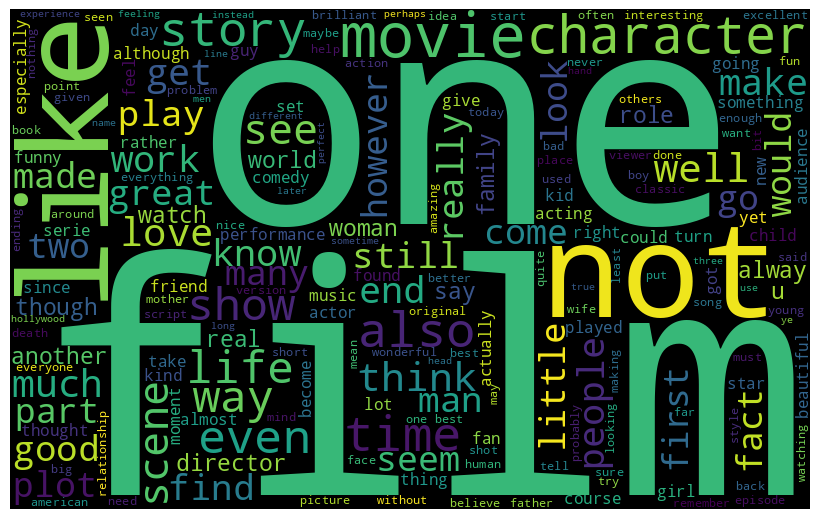

In [12]:
from wordcloud import WordCloud
words_list = df[df['label']==1]['processed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

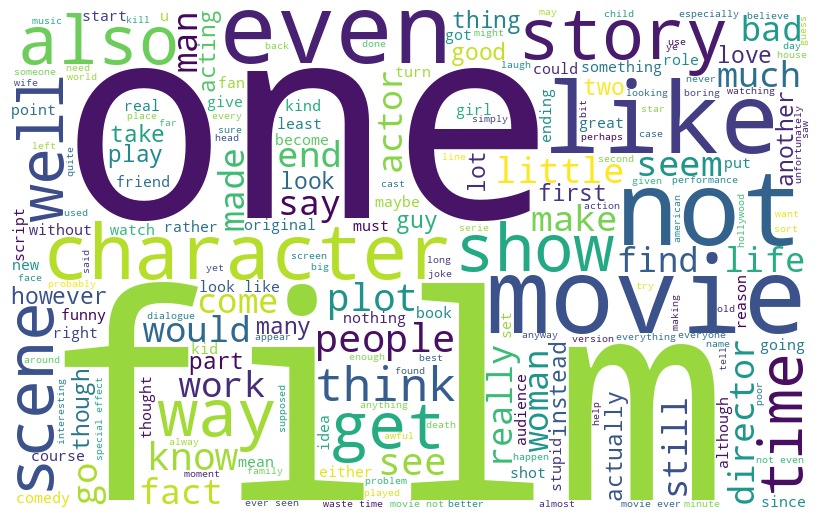

In [13]:
from wordcloud import WordCloud
words_list = df[df['label']==0]['processed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,background_color='white',
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Split the data to (70-30) train and test

In [14]:
from sklearn.model_selection import train_test_split
X=df['processed_review']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Train data size ",X_train.shape[0])
print("Test data size ",X_test.shape[0])

Train data size  35000
Test data size  15000


# Word2vec

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense ,Dropout
from tensorflow.keras import layers

In [16]:
from gensim.models import Word2Vec
X_token=X_train.apply(word_tokenize)
model_w2v = Word2Vec(X_token, vector_size=200, window=5, min_count=1, workers=4, sg=0)

In [17]:
print(model_w2v.wv.most_similar('film'))

[('movie', 0.7769739627838135), ('flick', 0.5983647704124451), ('cinema', 0.5848045349121094), ('documentary', 0.5630687475204468), ('product', 0.5473772287368774), ('thriller', 0.5357656478881836), ('however', 0.5325766801834106), ('sadly', 0.5267467498779297), ('picture', 0.5218381881713867), ('genre', 0.5108773112297058)]


In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index)+1

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq , maxlen=max_len , padding='post')
X_test_padded = pad_sequences(X_test_seq , maxlen=max_len , padding='post')
vocab_size

79055

In [19]:
import numpy as np

embedding_matrix = np.zeros((vocab_size, model_w2v.vector_size))
# Fill the embedding matrix with Word2Vec vectors
for word, i in tokenizer.word_index.items():
    if word in model_w2v.wv:
        embedding_matrix[i] = model_w2v.wv[word]

# Simple RNN

In [ ]:
model_RNN = Sequential([
  layers.Input(shape=(max_len,)),
  layers.Embedding(input_dim=vocab_size, output_dim=model_w2v.vector_size, weights=[embedding_matrix],trainable=False),
  SimpleRNN(128),
  Dropout(0.3),
  Dense(64, activation="relu"),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_RNN.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 1437, 200)           │      15,811,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 128)                 │          42,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,861,433 (60.51 MB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 15,811,000 (60.31 MB)

In [ ]:
history=model_RNN.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 175ms/step - accuracy: 0.5047 - loss: 0.7038 - val_accuracy: 0.4953 - val_loss: 0.6973
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.5028 - loss: 0.7091 - val_accuracy: 0.4950 - val_loss: 0.6940
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.5098 - loss: 0.6993 - val_accuracy: 0.4884 - val_loss: 0.6950
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.5110 - loss: 0.6962 - val_accuracy: 0.4970 - val_loss: 0.6933
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.4995 - loss: 0.6937 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.4970 - val_loss: 0.6931
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.5068 - loss: 0.6929 - val_accuracy: 0.5036 - val_loss: 0.6930
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.4993 - loss: 0

In [ ]:
# Evaluate the model on test data
loss, accuracy = model_RNN.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.4931 - loss: 0.6926
Test Loss: 0.6924746632575989
Test Accuracy: 0.49346667528152466


<Axes: >

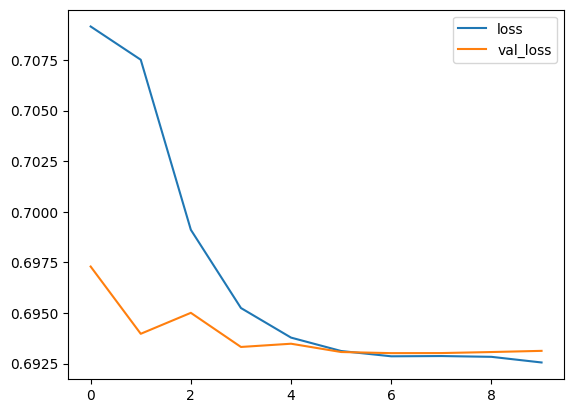

In [ ]:
df_his=pd.DataFrame(history.history)
df_his[['loss','val_loss']].plot()

# LSTM

In [ ]:
LSTM_model = Sequential([
  layers.Input(shape=(max_len,)),
  layers.Embedding(input_dim=vocab_size, output_dim=model_w2v.vector_size, weights=[embedding_matrix],trainable=False),
  layers.LSTM(128),
  Dropout(0.3),
  Dense(64, activation="relu"),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])

LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 1437, 200)           │      15,811,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 128)                 │         168,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,987,769 (60.99 MB)

 Trainable params: 176,769 (690.50 KB)

 Non-trainable params: 15,811,000 (60.31 MB)

In [ ]:
LSTM_history=LSTM_model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.5081 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6935
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.5018 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6933
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.5031 - loss: 0

In [ ]:
# Evaluate the model
loss, accuracy = LSTM_model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4922 - loss: 0.6933
Test Loss: 0.6932944655418396
Test Accuracy: 0.492333322763443


<Axes: >

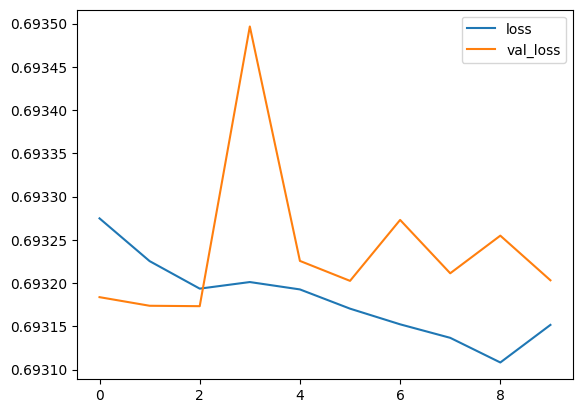

In [ ]:
df_LSTM=pd.DataFrame(LSTM_history.history)
df_LSTM[['loss','val_loss']].plot()

# Adding bidirectional

In [ ]:
BI_LSTM_model = Sequential([
  layers.Input(shape=(max_len,)),
  layers.Embedding(input_dim=vocab_size, output_dim=model_w2v.vector_size, weights=[embedding_matrix],trainable=False),
  layers.Bidirectional(layers.LSTM(128,return_sequences=True)),
  layers.GlobalMaxPool1D(),
  Dropout(0.3),
  Dense(64, activation="relu"),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])

BI_LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

BI_LSTM_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 1437, 200)           │      15,811,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 1437, 256)           │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_3               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,164,409 (61.66 MB)

 Trainable params: 353,409 (1.35 MB)

 Non-trainable params: 15,811,000 (60.31 MB)

In [ ]:
BI_history=BI_LSTM_model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 57s 248ms/step - accuracy: 0.7518 - loss: 0.4809 - val_accuracy: 0.8730 - val_loss: 0.3025
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.8747 - loss: 0.3002 - val_accuracy: 0.8830 - val_loss: 0.2797
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 83s 252ms/step - accuracy: 0.8928 - loss: 0.2639 - val_accuracy: 0.8901 - val_loss: 0.2619
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.8998 - loss: 0.2460 - val_accuracy: 0.8917 - val_loss: 0.2619
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.8824 - loss: 0.2829 - val_accuracy: 0.8937 - val_loss: 0.2552
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 56s 258ms/step - accuracy: 0.9093 - loss: 0.2236 - val_accuracy: 0.8979 - val_loss: 0.2594
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.9176 - loss: 0.2016 - val_accuracy: 0.9001 - val_loss: 0.2433
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.9308 - loss: 0

In [ ]:
# Evaluate the model
loss, accuracy = BI_LSTM_model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9065 - loss: 0.2468
Test Loss: 0.25816527009010315
Test Accuracy: 0.9020000100135803


<Axes: >

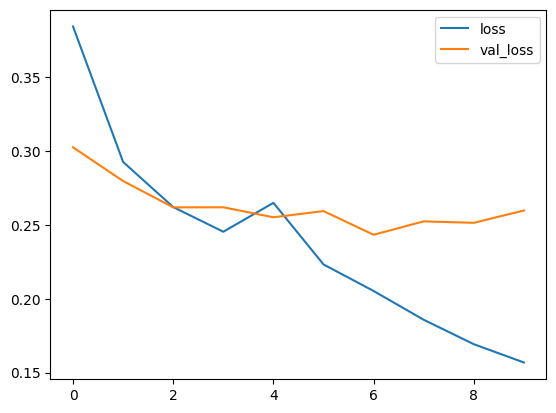

In [ ]:
df_hist_BI=pd.DataFrame(BI_history.history)
df_hist_BI[['loss','val_loss']].plot()

# Adding regularizers and early stop

In [20]:
from tensorflow.keras import regularizers, callbacks

BI_LSTM_model2 = Sequential([
    layers.Input(shape=(max_len,)),
    layers.Embedding(input_dim=vocab_size, output_dim=model_w2v.vector_size, weights=[embedding_matrix], trainable=False),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

BI_LSTM_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

BI_LSTM_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1437, 200)           │      15,811,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1437, 256)           │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,164,409 (61.66 MB)

 Trainable params: 353,409 (1.35 MB)

 Non-trainable params: 15,811,000 (60.31 MB)

In [21]:
BI_history2=BI_LSTM_model2.fit(X_train_padded, y_train, epochs=100, batch_size=128, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 61s 250ms/step - accuracy: 0.7407 - loss: 3.2722 - val_accuracy: 0.8620 - val_loss: 0.5438
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 57s 263ms/step - accuracy: 0.8578 - loss: 0.5046 - val_accuracy: 0.8681 - val_loss: 0.4080
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.8613 - loss: 0.4112 - val_accuracy: 0.8431 - val_loss: 0.4309
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.8675 - loss: 0.3799 - val_accuracy: 0.8754 - val_loss: 0.3595
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.8673 - loss: 0.3719 - val_accuracy: 0.8703 - val_loss: 0.3702
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 253ms/step - accuracy: 0.8669 - loss: 0.3693 - val_accuracy: 0.8763 - val_loss: 0.3501
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 251ms/step - accuracy: 0.8727 - loss: 0.3564 - val_accuracy: 0.8786 - val_loss: 0.3427
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 252ms/step - accuracy: 0.8806 -

In [22]:
# Evaluate the model on test data
loss, accuracy = BI_LSTM_model2.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8923 - loss: 0.3020
Test Loss: 0.30561235547065735
Test Accuracy: 0.8907333612442017


<Axes: >

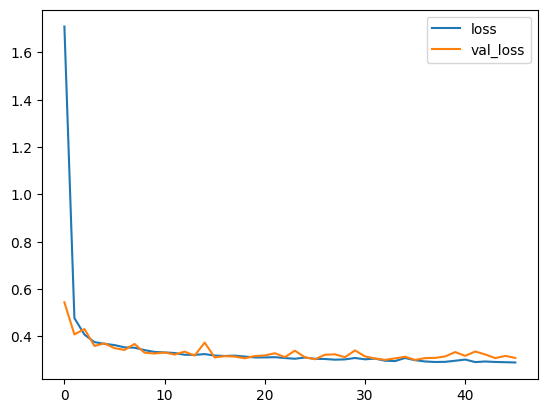

In [24]:
df_hist_BI2=pd.DataFrame(BI_history2.history)
df_hist_BI2[['loss','val_loss']].plot()